In [1]:
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cftime
import dask
import xarrayutils
import cartopy.crs as ccrs
from xmip.preprocessing import combined_preprocessing
from xmip.preprocessing import replace_x_y_nominal_lat_lon
from xmip.drift_removal import replace_time
from xmip.postprocessing import concat_experiments
import xmip.drift_removal as xm_dr
import xmip as xm
import xesmf as xe
import datetime
from dateutil.relativedelta import relativedelta
import utils


from matplotlib.lines import Line2D
import matplotlib.patches as mpatches


import string
alphabet = list(string.ascii_lowercase)
          

## Data

Data for this is from https://gmd.copernicus.org/articles/11/1133/2018/ CDRMIP data, where pi-CO2pulse is the 100GtC pulse and piControl is the control

In [2]:
G_pulse_ds = xr.open_dataset('Outputs/G_pulse_ds.nc4')['__xarray_dataarray_variable__']
G_cdr_ds = xr.open_dataset('Outputs/G_cdr_ds.nc4')['__xarray_dataarray_variable__']

#4th order polyfit
G_ds_path = 'Outputs/G_pulse_ds.nc4'
G_cdr_ds_path = 'Outputs/G_cdr_ds.nc4'

G_ds = utils.import_polyfit_G(G_ds_path, G_cdr_ds_path)

In [3]:
A = utils.A

In [4]:
model_color = utils.model_color

In [5]:
G_ds

<xarray.DataArray 'G[tas]' (pulse_type: 2, s: 241, model: 8, lat: 180, lon: 360)>
array([[[[[ 9.61705867e-03,  9.70463742e-03,  9.75718533e-03, ...,
            9.40231510e-03,  9.46821594e-03,  9.54263731e-03],
          [ 1.41432324e-02,  1.42055116e-02,  1.42434044e-02, ...,
            1.40211318e-02,  1.41057661e-02,  1.41241359e-02],
          [ 1.68679251e-02,  1.69323304e-02,  1.69716703e-02, ...,
            1.66774520e-02,  1.67848278e-02,  1.68259146e-02],
          ...,
          [ 1.77570132e-02,  1.78432241e-02,  1.78951343e-02, ...,
            1.74432039e-02,  1.75895964e-02,  1.76731876e-02],
          [ 1.71525015e-02,  1.72186667e-02,  1.72584563e-02, ...,
            1.69523499e-02,  1.70421180e-02,  1.70972552e-02],
          [ 1.64136307e-02,  1.64410084e-02,  1.64574352e-02, ...,
            1.64011548e-02,  1.64051674e-02,  1.64093990e-02]],

         [[ 8.50881895e-03,  8.54098592e-03,  8.54098592e-03, ...,
            8.46752899e-03,  8.50193210e-03,  8.50549119e-03],
          [ 8.50881895e-03,  8.54098592e-03,  8.54098592e-03, ...,
            8.46752899e-03,  8.50193210e-03,  8.50549119e-03],
          [ 8.50881895e-03,  8.54098592e-03,  8.54098592e-03, ...,
            8.46752899e-03,  8.50193210e-03,  8.50549119e-03],
...
          [ 3.73804743e-03,  4.90253079e-03,  4.90253079e-03, ...,
            3.58424750e-03,  3.61445377e-03,  3.61757868e-03],
          [ 3.73804744e-03,  4.90253079e-03,  4.90253079e-03, ...,
            3.58424750e-03,  3.61445377e-03,  3.61757868e-03],
          [ 3.73804745e-03,  4.90253079e-03,  4.90253079e-03, ...,
            3.58424750e-03,  3.61445377e-03,  3.61757868e-03]],

         [[-4.22144000e-03, -5.15256099e-03, -5.15256099e-03, ...,
           -3.21557877e-03, -4.03984113e-03, -4.12511316e-03],
          [-4.22143999e-03, -5.15256099e-03, -5.15256099e-03, ...,
           -3.21557877e-03, -4.03984113e-03, -4.12511316e-03],
          [-4.22143999e-03, -5.15256099e-03, -5.15256099e-03, ...,
           -3.21557877e-03, -4.03984113e-03, -4.12511316e-03],
          ...,
          [-1.23292564e-01, -1.23369219e-01, -1.23369219e-01, ...,
           -1.22432903e-01, -1.23204781e-01, -1.23284634e-01],
          [-1.23292564e-01, -1.23369219e-01, -1.23369219e-01, ...,
           -1.22432903e-01, -1.23204781e-01, -1.23284634e-01],
          [-1.23292564e-01, -1.23369219e-01, -1.23369219e-01, ...,
           -1.22432903e-01, -1.23204781e-01, -1.23284634e-01]]]]])
Coordinates:
  * model       (model) object 'UKESM1_r1' 'MIROC' ... 'CANESM5_r3p2'
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) int64 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * s           (s) int64 0 1 2 3 4 5 6 7 8 ... 233 234 235 236 237 238 239 240
  * pulse_type  (pulse_type) object 'pulse' 'cdr'

## Global Mean plots

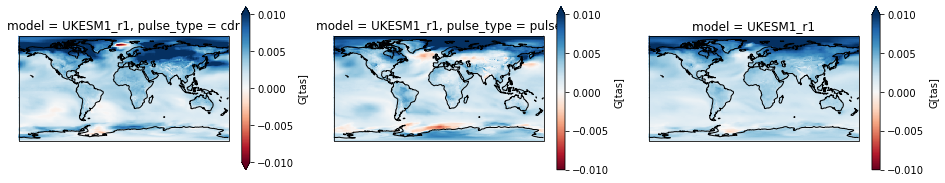

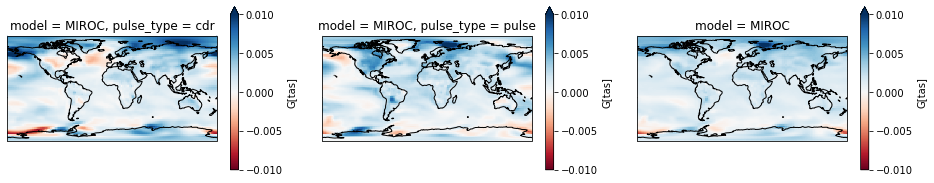

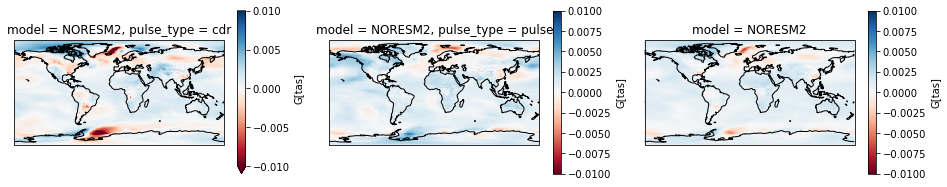

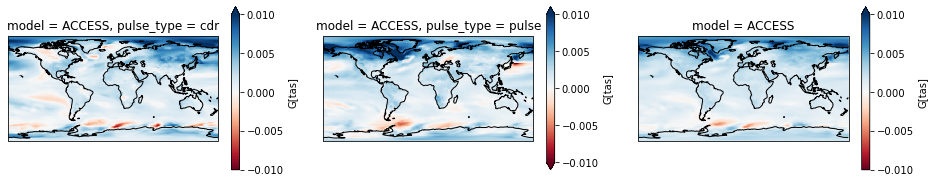

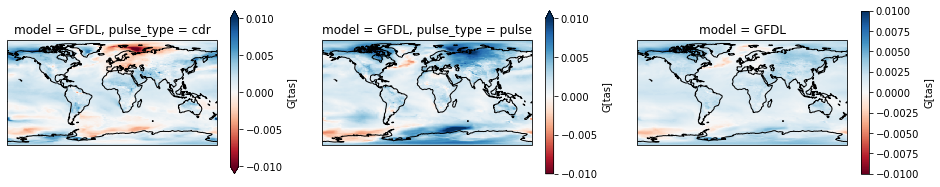

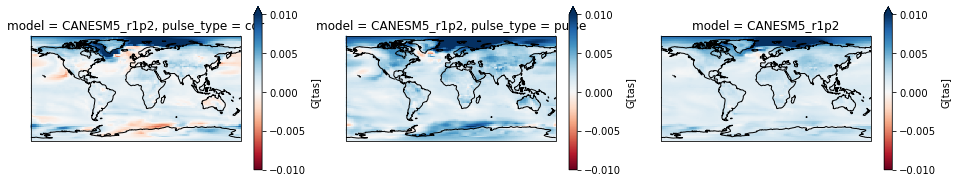

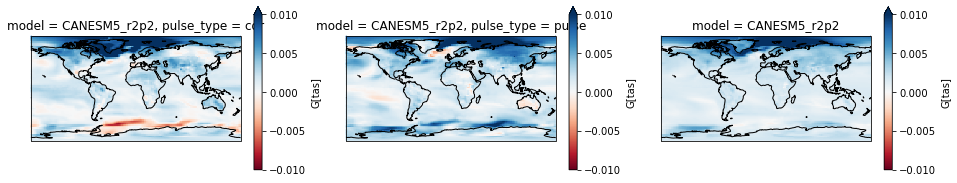

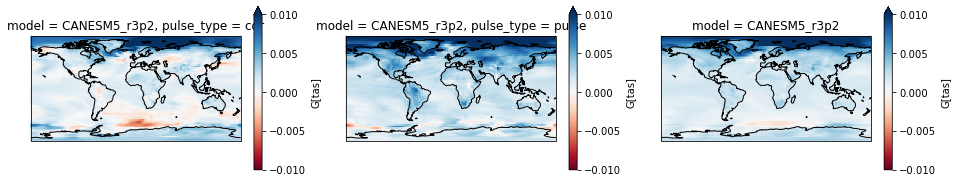

In [33]:
for m in G_ds.model.values:
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,subplot_kw = {'projection':ccrs.PlateCarree()}, figsize = [16,3])
    (G_ds).sel(pulse_type = 'cdr').sel(model = m).sel(s = slice(0,50)).mean(dim = 's').plot(ax = ax1, transform = ccrs.PlateCarree(), vmin = -0.01, vmax = 0.01, cmap = 'RdBu')
    (G_ds).sel(pulse_type = 'pulse').sel(model = m).sel(s = slice(0,50)).mean(dim = 's').plot(ax = ax2, transform = ccrs.PlateCarree(), vmin = -0.01, vmax = 0.01, cmap = 'RdBu')
    (G_ds).mean(dim = 'pulse_type').sel(model = m).sel(s = slice(0,50)).mean(dim = 's').plot(ax = ax3, transform = ccrs.PlateCarree(), vmin = -0.01, vmax = 0.01, cmap = 'RdBu')
    ax1.coastlines()
    ax2.coastlines()
    ax3.coastlines()

In [ ]:
(G_ds).mean(dim = 'pulse_type').weighted().mean(dim = 'model').sel(model = m).sel(s = slice(0,50)).mean(dim = 's').plot(ax = ax3, transform = ccrs.PlateCarree())


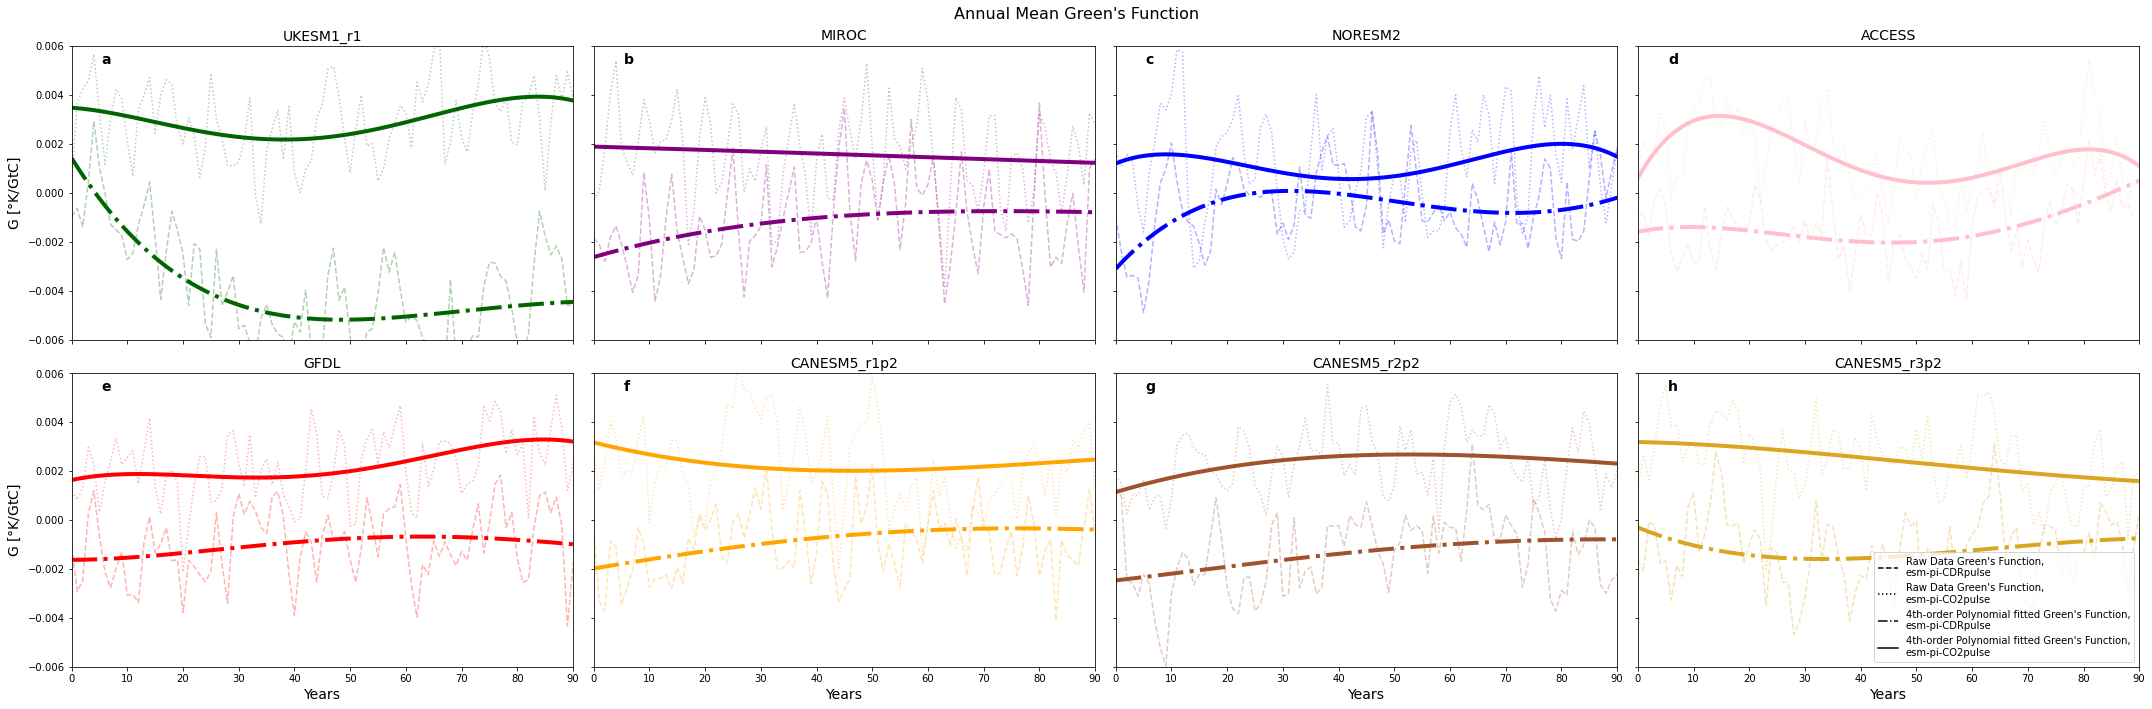

In [14]:
fig, axes = plt.subplots(2,4,figsize = [30,10], sharey = True, sharex = True)
alpha_labels = iter(alphabet)

plt.suptitle('Annual Mean Green\'s Function', fontsize = 16)
for ax, m in zip(axes.ravel(), G_ds.model.values):
    G_ds.sel(pulse_type = 'pulse').weighted(A).mean(dim = ['lat','lon']).sel(model = m).plot(ax = ax, color = model_color[m], linewidth = 4)
    (-G_ds).sel(pulse_type = 'cdr').weighted(A).mean(dim = ['lat','lon']).sel(model = m).plot(ax = ax, color = model_color[m], linestyle = '-.', linewidth = 4)
    (G_cdr_ds).weighted(A).mean(dim = ['lat','lon']).sel(model = m).plot(ax = ax, color = model_color[m], linestyle = '--', alpha = 0.3)
    G_pulse_ds.weighted(A).mean(dim = ['lat','lon']).sel(model = m).plot(ax = ax, color = model_color[m], linestyle = ':', alpha = 0.3)

    ax.set_xlim(0, 90)
    ax.set_title(m, fontsize = 14)
    ax.set_ylim(-0.006, 0.006)
    
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    label = next(alpha_labels)
    ax.text(x = .06, y =.94, s = label, transform=ax.transAxes, fontweight="bold", fontsize = 14)
  
    
axes[0,0].set_ylabel('G [$\degree$K/GtC]', fontsize = 14)
axes[1,0].set_ylabel('G [$\degree$K/GtC]', fontsize = 14)
for idx in [0,1,2,3]:
    axes[1,idx].set_xlabel('Years', fontsize = 14)


####### legend ##########
raw_cdr = Line2D([0], [0], linestyle = '--', label='Raw Data Green\'s Function,\nesm-pi-CDRpulse', color='black')
raw_pulse = Line2D([0], [0], linestyle = ':', label='Raw Data Green\'s Function,\nesm-pi-CO2pulse', color='black') 
cdr = Line2D([0], [0], linestyle = '-.', label='4th-order Polynomial fitted Green\'s Function,\nesm-pi-CDRpulse', color='black')
pulse = Line2D([0], [0], label='4th-order Polynomial fitted Green\'s Function,\nesm-pi-CO2pulse', color='black')
handles = [raw_cdr, raw_pulse, cdr, pulse]
plt.legend(handles=handles)

plt.tight_layout()
plt.savefig('figures/paper/supplement/GF_mean_all_models.png', bbox_inches = 'tight', dpi = 300)

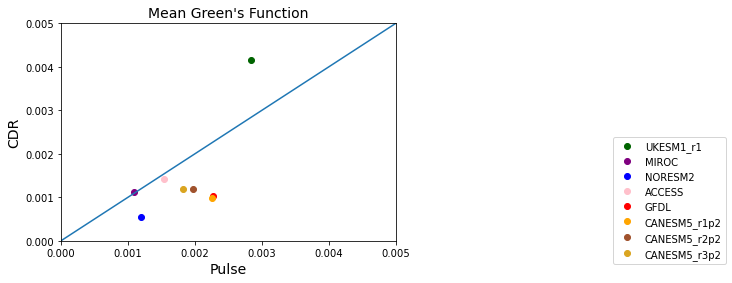

In [11]:
for m in G_ds.model.values:
    plt.plot(G_ds.weighted(A).mean(dim = ['year','lat','lon']).sel(model = m), -
             G_cdr_ds.weighted(A).mean(dim = ['year','lat','lon']).sel(model = m), 
             'o', color = utils.model_color[m], label = m)
plt.plot(np.arange(0,0.006,0.0001),np.arange(0,0.006,0.0001))
plt.legend(bbox_to_anchor=(2.0,0.5))
plt.xlim(0,0.005)
plt.xlabel('Pulse', fontsize = 14)
plt.ylim(0,0.005)
plt.ylabel('CDR', fontsize = 14)
plt.title('Mean Green\'s Function', fontsize = 14)
plt.savefig('figures/GF_dev/comparison_mean.png', bbox_inches = 'tight', dpi = 300)

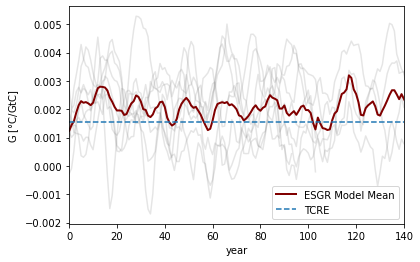

In [12]:
for m in G_ds.model:
    G_ds.weighted(A).mean(dim = ['lat','lon']).sel(model = m).plot(alpha = .2, color = 'grey')
plt.title('Annual Mean', fontsize = 16)
plt.xlim(G_ds.year.min(), G_ds.year[140].values)

G_ds.weighted(A).mean(dim = ['lat','lon']).mean(dim = 'model').plot(label = 'ESGR Model Mean', color = 'maroon', linewidth = 2)
plt.axhline(0.00155475, linestyle = '--', label = 'TCRE')
plt.ylabel('G [$\degree$C/GtC]')
plt.legend()
plt.savefig('figures/GF_dev/all_models_monthly.png', bbox_inches = 'tight', dpi = 350)


## Spatial Plots

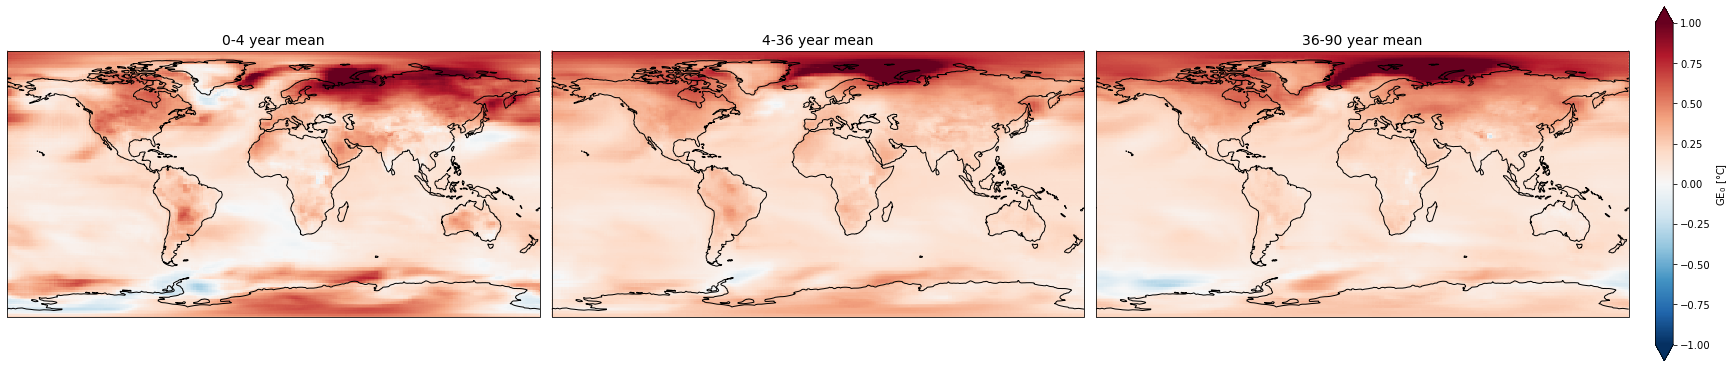

In [8]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize = [24,5], subplot_kw = {'projection':ccrs.PlateCarree()}, constrained_layout=True)
(G_ds.mean(dim = ['model'])*100).isel(year = slice(0,4)).mean(dim = 'year').plot(ax = ax0, vmax = 1, vmin = -1, transform = ccrs.PlateCarree(), extend = 'both', cmap = 'RdBu_r', add_colorbar = False)
ax0.set_title('0-4 year mean', fontsize = 14)
ax0.coastlines()
(G_ds.mean(dim = ['model'])*100).isel(year = slice(4,36)).mean(dim = 'year').plot(ax = ax1, vmax = 1, vmin = -1, transform = ccrs.PlateCarree(), extend = 'both', cmap = 'RdBu_r', add_colorbar = False)
ax1.set_title('4-36 year mean', fontsize = 14)
ax1.coastlines()

(G_ds.mean(dim = ['model'])*100).isel(year = slice(36,90)).mean(dim = 'year').plot(ax = ax2, vmax = 1, vmin = -1, transform = ccrs.PlateCarree(), extend = 'both', cmap = 'RdBu_r',
                                                       cbar_kwargs = {'label':'GE$_0$ [$\degree$C]'})
ax2.set_title('36-90 year mean', fontsize = 14)
ax2.coastlines()


plt.savefig('figures/paper/GF_time_varying_long.png', bbox_inches = 'tight', dpi = 350)

In [8]:
import cmocean

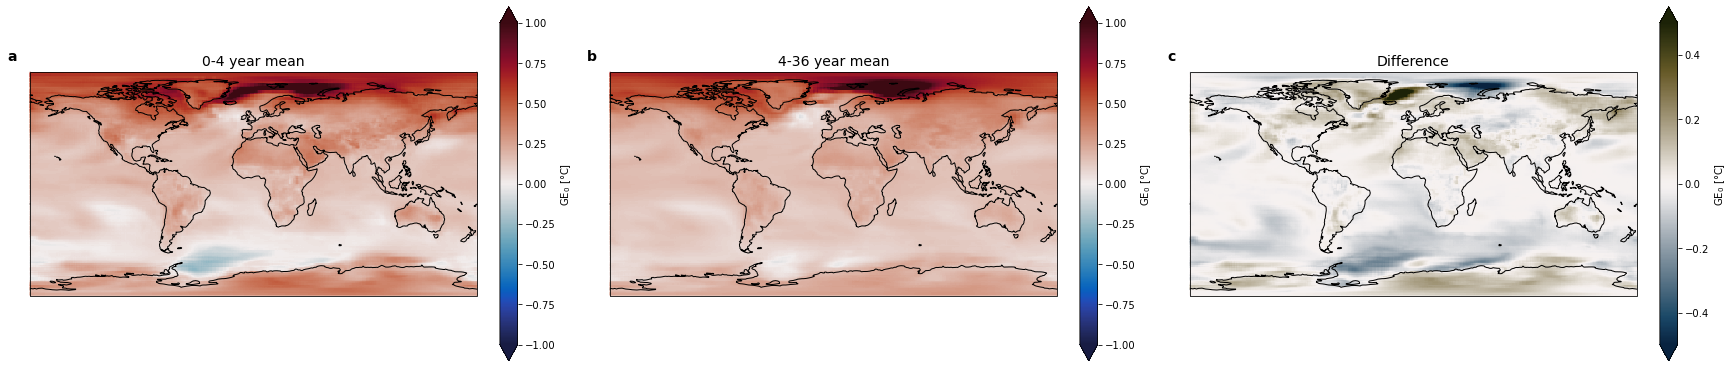

In [12]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize = [24,5], subplot_kw = {'projection':ccrs.PlateCarree()}, constrained_layout=True)
alpha_labels = iter(alphabet)

(G_ds.mean(dim = ['model', 'pulse_type'])*100).isel(s = slice(0,4)).mean(dim = 's').plot(ax = ax0, vmax = 1, vmin = -1, transform = ccrs.PlateCarree(), extend = 'both', cmap = cmocean.cm.balance,
                                                       cbar_kwargs = {'label':'GE$_0$ [$\degree$C]'})
ax0.set_title('0-4 year mean', fontsize = 14)
ax0.coastlines()
(G_ds.mean(dim = ['model', 'pulse_type'])*100).isel(s = slice(4,36)).mean(dim = 's').plot(ax = ax1, vmax = 1, vmin = -1, transform = ccrs.PlateCarree(), extend = 'both', cmap = cmocean.cm.balance,
                                                       cbar_kwargs = {'label':'GE$_0$ [$\degree$C]'})
ax1.set_title('4-36 year mean', fontsize = 14)
ax1.coastlines()

((G_ds.mean(dim = ['model', 'pulse_type'])*100).isel(s = slice(0,4)).mean(dim = 's') - 
 (G_ds.mean(dim = ['model', 'pulse_type'])*100).isel(s = slice(4,36)).mean(dim = 's')).plot(ax = ax2, vmax = 0.5, vmin = -0.5, transform = ccrs.PlateCarree(), extend = 'both', cmap = cmocean.cm.diff,
                                                       cbar_kwargs = {'label':'GE$_0$ [$\degree$C]'})
ax2.set_title('Difference', fontsize = 14)
ax2.coastlines()

for ax in [ax0,ax1,ax2]:
    label = next(alpha_labels)
    ax.text(x = -0.05, y =1.05, s = label, transform=ax.transAxes, fontweight="bold", fontsize = 14)

plt.savefig('figures/paper/supplement/GF_time_varying.png', bbox_inches = 'tight', dpi = 350)